## **AB Testi ile Bidding Yöntemlerinin Dönüşümünün Karşılaştırılması**

#### **İŞ PROBLEMİ**

* Facebook kısa süre önce mevcut "maximum bidding" adı verilen
teklif verme türüne alternatif olarak yeni bir teklif türü olan
"average bidding"’i tanıttı.

* Müşterilerimizden biri olan bombabomba.com, bu yeni özelliği test
etmeye karar verdi ve average bidding'in maximum bidding'den
daha fazla dönüşüm getirip getirmediğini anlamak için bir A/B
testi yapmak istiyor.

* A/B testi 1 aydır devam ediyor ve bombabomba.com şimdi sizden
bu A/B testinin sonuçlarını analiz etmenizi bekliyor.
Bombabomba.com için nihai başarı ölçütü Purchase'dır. Bu
nedenle, istatistiksel testler için Purchase metriğine
odaklanılmalıdır.

#### **Veri Seti Hikayesi**

Bir firmanın web site bilgilerini içeren bu veri setinde kullanıcıların gördükleri ve tıkladıkları reklam sayıları gibi bilgilerin yanı sıra
buradan gelen kazanç bilgileri yer almaktadır. Kontrol ve Test grubu olmak üzere iki ayrı veri seti vardır. Bu veri setleri
ab_testing.xlsx excel’inin ayrı sayfalarında yer almaktadır. Kontrol grubuna Maximum Bidding, test grubuna Average
Bidding uygulanmıştır.

$\circledast$ **Impression :** Reklam görüntüleme sayısı

$\circledast$  **Click :** Görüntülenen reklama tıklama sayısı

$\circledast$  **Purchase :** Tıklanan reklamlar sonrası satın alınan ürün sayısı

$\circledast$  **Earning :** Satın alınan ürünler sonrası elde edilen kazanç



In [1]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### **Proje Görevleri**

#### **Görev 1:** Veriyi Hazırlama ve Analiz Etme

**Adım 1:** ab_testing_data.xlsx adlı kontrol ve test grubu verilerinden oluşan veri setini okutunuz. Kontrol ve test grubu verilerini ayrı
değişkenlere atayınız.

In [24]:
df = pd.read_excel("/content/drive/MyDrive/DSMLBC10/week_6 (03.11.22-09.11.22)/ab_testing/project/ab_testing.xlsx")
df.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [25]:
control = pd.read_excel("/content/drive/MyDrive/DSMLBC10/week_6 (03.11.22-09.11.22)/ab_testing/project/ab_testing.xlsx", sheet_name="Control Group")
control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [26]:
test = pd.read_excel("/content/drive/MyDrive/DSMLBC10/week_6 (03.11.22-09.11.22)/ab_testing/project/ab_testing.xlsx", sheet_name="Test Group")
test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


**Adım 2:** Kontrol ve test grubu verilerini analiz ediniz.

**Kontrol Verisi Analizi** 

In [6]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [7]:
control.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [8]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


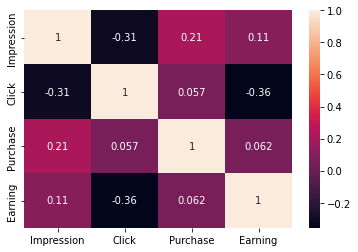

In [9]:
sns.heatmap(control.corr(), annot=True)

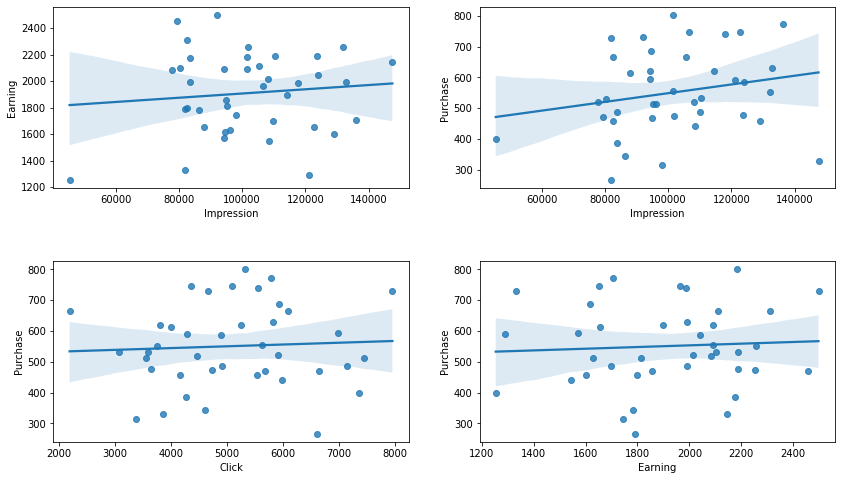

In [10]:
fig, axes = plt.subplots(2,2,figsize=(14, 8))
plt.subplots_adjust(hspace= 0.4)
sns.regplot(ax=axes[0,0],  x="Impression", y="Earning", data=control)
sns.regplot(ax=axes[0,1],  x="Impression", y="Purchase", data=control )
sns.regplot(ax=axes[1,0],  x="Click", y="Purchase", data=control)
sns.regplot(ax=axes[1,1],  x="Earning", y="Purchase", data=control)

**Test Verisi Analizi** 

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [12]:
test.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [13]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


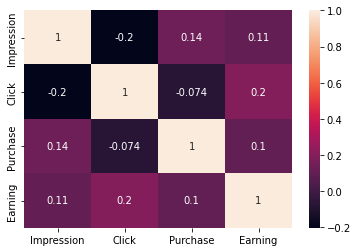

In [14]:
sns.heatmap(test.corr(), annot=True)

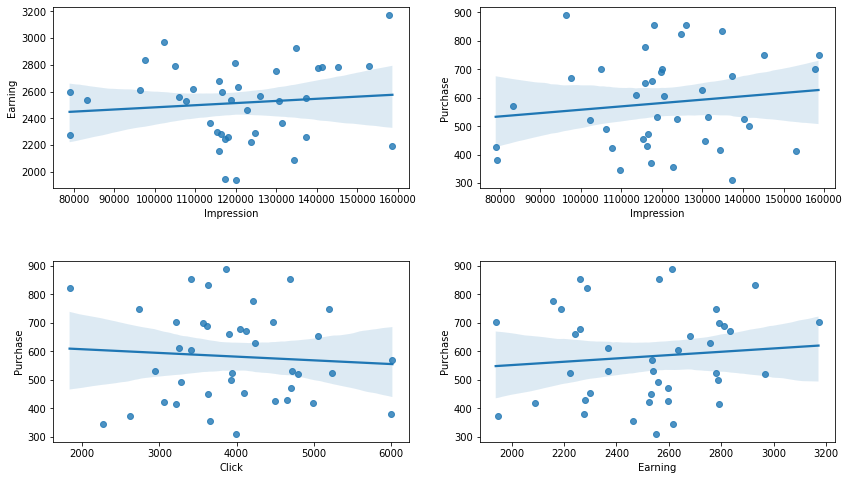

In [15]:
fig, axes = plt.subplots(2,2,figsize=(14, 8))
plt.subplots_adjust(hspace= 0.4)
sns.regplot(ax=axes[0,0],  x="Impression", y="Earning", data=test)
sns.regplot(ax=axes[0,1],  x="Impression", y="Purchase", data=test)
sns.regplot(ax=axes[1,0],  x="Click", y="Purchase", data=test)
sns.regplot(ax=axes[1,1],  x="Earning", y="Purchase", data=test)

**Adım 3:** Analiz işleminden sonra concat metodunu kullanarak kontrol ve test grubu verilerini birleştiriniz.

In [31]:
control["class"] = "control" 

In [30]:
test["class"] = "test" 

In [35]:
df = pd.concat([control, test], axis = 0)
df

,Impression,Click,Purchase,Earning,class
0,82529.45927,6090.07732,665.21125,2311.27714,control
1,98050.45193,3382.86179,315.08489,1742.80686,control
2,82696.02355,4167.96575,458.08374,1797.82745,control
3,109914.40040,4910.88224,487.09077,1696.22918,control
4,108457.76263,5987.65581,441.03405,1543.72018,control
...,...,...,...,...,...
35,79234.91193,6002.21358,382.04712,2277.86398,test
36,130702.23941,3626.32007,449.82459,2530.84133,test
37,116481.87337,4702.78247,472.45373,2597.91763,test
38,79033.83492,4495.42818,425.35910,2595.85788,test


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 39
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  80 non-null     float64
 1   Click       80 non-null     float64
 2   Purchase    80 non-null     float64
 3   Earning     80 non-null     float64
 4   class       80 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.8+ KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,80.00000,111111.93041,21623.80775,45475.94296,95063.86063,114037.03500,124138.65239,158605.92048
Click,80.00000,4534.10357,1272.37607,1836.62986,3632.89183,4321.60283,5272.61606,7959.12507
Purchase,80.00000,566.50008,148.14184,267.02894,458.13788,532.12508,679.55760,889.91046
Earning,80.00000,2211.72952,421.70058,1253.98952,1945.71316,2205.53626,2541.37752,3171.48971


####**Görev 2:** A/B Testinin Hipotezinin Tanımlanması

**Adım 1:** Hipotezi tanımlayınız.

H0 : M1 = M2     **Kontrol ve test gruplarının kazanç ortalamaları arasında istatistiksel olarak anlamlı farklılık YOKTUR.** 

H1 : M1!= M2     **Kontrol ve test gruplarının kazanç ortalamaları arasında istatistiksel olarak anlamlı farklılık VARDIR.**

**Adım 2:** Kontrol ve test grubu için purchase (kazanç) ortalamalarını analiz ediniz.

In [39]:
df.groupby("class").agg({"Purchase":"mean"})

,Purchase
class,
control,550.89406
test,582.10610


**Matematiksel olarak iki grubun kazanç ortalamaları arasında fark vardır. Acaba gerçekten anlamlı bir fark var mı ? Yoksa bu fark şans eseri mi ortaya çıktı ?**

#### **Görev 3:** Hipotez Testinin Gerçekleştirilmesi

**Adım 1:** Hipotez testi yapılmadan önce varsayım kontrollerini yapınız.
Bunlar Normallik Varsayımı ve Varyans Homojenliğidir. Kontrol ve test grubunun normallik varsayımına uyup uymadığını Purchase değişkeni
üzerinden ayrı ayrı test ediniz.

**Normallik Varsayımı :**

* H0: Normal dağılım varsayımı sağlanmaktadır.

* H1: Normal dağılım varsayımı sağlanmamaktadır.

* p < 0.05 H0 RED , p > 0.05 H0 REDDEDİLEMEZ

* Test sonucuna göre normallik varsayımı kontrol ve test grupları için sağlanıyor mu ? Elde edilen p-value değerlerini yorumlayınız.

**Varyans Homojenliği :**

* H0: Varyanslar homojendir.

* H1: Varyanslar homojen Değildir.

* p < 0.05 H0 RED , p > 0.05 H0 REDDEDİLEMEZ

* Kontrol ve test grubu için varyans homojenliğinin sağlanıp sağlanmadığını Purchase değişkeni üzerinden test ediniz.

* Test sonucuna göre normallik varsayımı sağlanıyor mu? Elde edilen p-value değerlerini yorumlayınız.

In [41]:
test_stat, pvalue = shapiro(df.loc[df["class"]=="control", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = 0.977, p-value = 0.589


In [42]:
test_stat, pvalue = shapiro(df.loc[df["class"]=="test", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = 0.959, p-value = 0.154


In [43]:
test_stat, pvalue = levene(df.loc[df["class"]=="control", "Purchase"], df.loc[df["class"]=="test", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = 2.639, p-value = 0.108


$\blacktriangleright$ Her iki grubunda p-value >  0.05'ten olduğu için H0 reddedilemez. Normallik varsayımı sağlanır. 

$\blacktriangleright$ p-value >  0.05 'ten olduğu için H0 reddedilemez. İki grubun kazanç ortalamaları varyansları homojendir.

**Adım 2:** Normallik Varsayımı ve Varyans Homojenliği sonuçlarına göre uygun testi seçiniz.

In [44]:
# Varsayımlar sağlandığı için t-testi uygulanır. (parametrik test)

test_stat, pvalue = ttest_ind(df.loc[df["class"]=="control", "Purchase"], df.loc[df["class"]=="test", "Purchase"])
print('Test Stat = %.3f, p-value = %.3f' % (test_stat, pvalue))

Test Stat = -0.942, p-value = 0.349


**Adım 3:** Test sonucunda elde edilen p_value değerini göz önünde bulundurarak kontrol ve test grubu satın alma ortalamaları arasında istatistiki
olarak anlamlı bir fark olup olmadığını yorumlayınız.

$\blacktriangleright$ p-value değeri 0.05 ten büyük olduğu için H0 reddedilemez. Dolayısıyla buradan çıkarılan sonuç kontrol ve test grubu satın alma ortalamaları arasında istatistiki olarak anlamlı bir fark yoktur. Aradaki fark şans eseri ortaya çıkmıştır. 

**Görev 4:** Sonuçların Analizi

**Adım 1:** Hangi testi kullandınız, sebeplerini belirtiniz.

$\blacktriangleright$  Varsayımlar sağlandığı için t-testi uygulandı.

**Adım 2:** Elde ettiğiniz test sonuçlarına göre müşteriye tavsiyede bulununuz.

$\blacktriangleright$ Kontrol grubundaki Maximum Bidding ve test grubundaki Average Bidding alınarak oluşturulan Purchase ortalama değerinin yapılan analizler sonucu istatistiki olarak anlamlı bir fark oluşturmadığı ortaya çıkmıştır. İki teklif türü de kullanılabilir. 